In [ ]:
! pip install tqdm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     # code from Kaggle, making and using api key to use dataset
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! pip install torch torchvision matplotlib

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Code provided by Kaggle
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import os

# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ResNet
# Using ResNet18 for simplicity
model = models.resnet18(pretrained=True)

# Paths to train and test directories (update these paths if needed)
train_dir = '/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train'


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


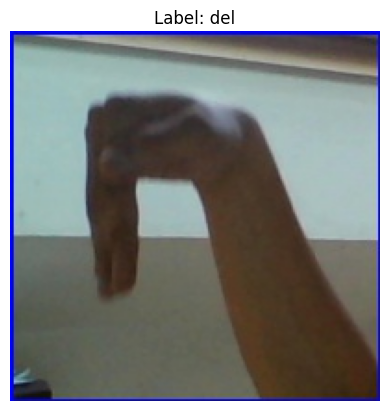

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Path to a random label directory
label = random.choice(os.listdir(train_dir))
label_path = os.path.join(train_dir, label)

# Randomly select an image from the label directory
image_name = random.choice(os.listdir(label_path))
image_path = os.path.join(label_path, image_name)

# Load and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


Group Mappings Table:
    Group           Letters Close Groups
0       1           A, S, E             
1       2                 B             
2       3  C, Q, del, space             
3       4              I, J            9
4       5                 K            7
5       6                 O             
6       7              U, V            5
7       8                 W             
8       9              Z, G            4
9      10                 H             
10     11                 R             
11     12                 Y           17
12     13              M, N             
13     14              T, X             
14     15              D, P             
15     16                 F             
16     17                 L           12
17     18           nothing             


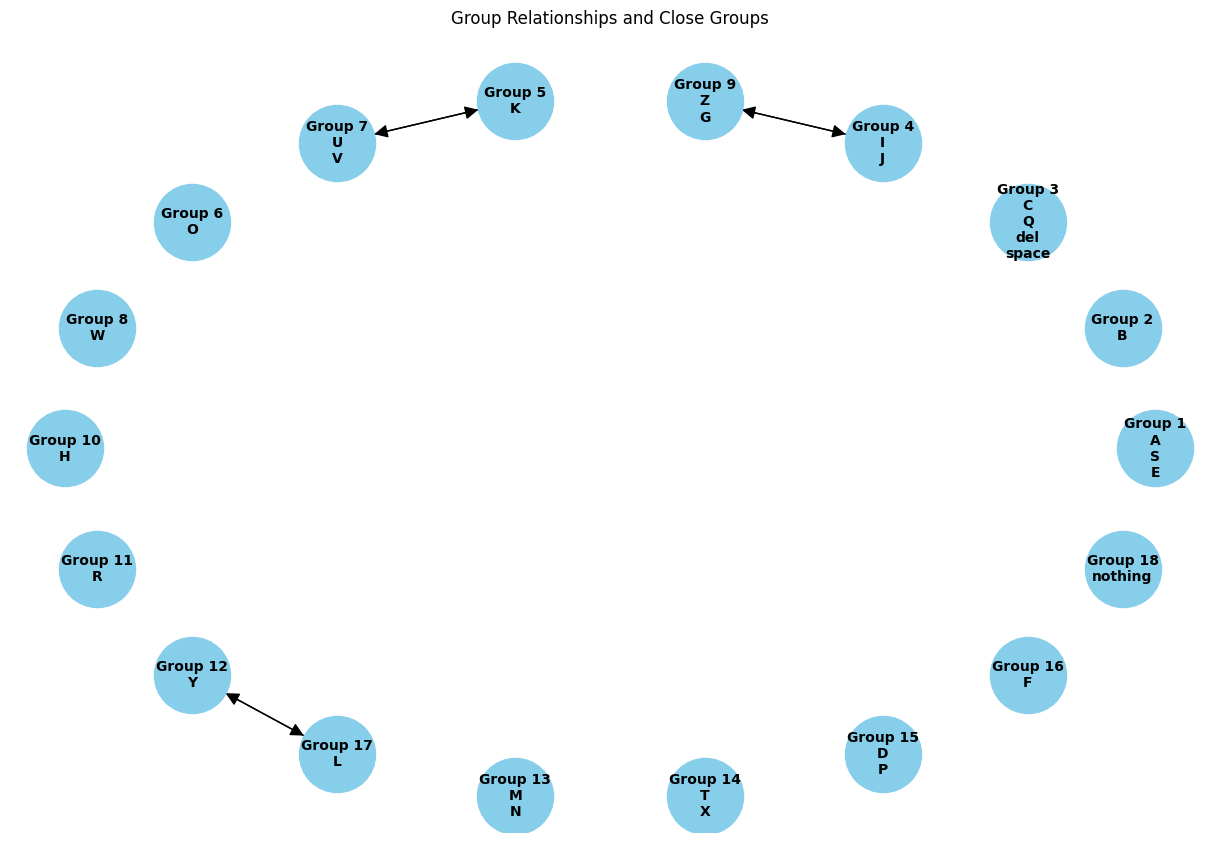

In [ ]:
import pandas as pd
import networkx as nx

# Define group mappings for similar letters/characters
groups = {
    1: {"letters": ["A", "S", "E"], "close_groups": []},
    2: {"letters": ["B"], "close_groups": []},
    3: {"letters": ["C", "Q", "del", "space"], "close_groups": []},
    4: {"letters": ["I", "J"], "close_groups": [9]},
    5: {"letters": ["K"], "close_groups": [7]},
    6: {"letters": ["O"], "close_groups": []},
    7: {"letters": ["U", "V"], "close_groups": [5]},
    8: {"letters": ["W"], "close_groups": []},
    9: {"letters": ["Z", "G"], "close_groups": [4]},
    10: {"letters": ["H"], "close_groups": []},
    11: {"letters": ["R"], "close_groups": []},
    12: {"letters": ["Y"], "close_groups": [17]},
    13: {"letters": ["M", "N"], "close_groups": []},
    14: {"letters": ["T", "X"], "close_groups": []},
    15: {"letters": ["D", "P"], "close_groups": []},
    16: {"letters": ["F"], "close_groups": []},
    17: {"letters": ["L"], "close_groups": [12]},
    18: {"letters": ["nothing"], "close_groups": []},
}

# Reverse mapping for fast lookup
letter_to_group = {}
for group, details in groups.items():
    for letter in details["letters"]:
        letter_to_group[letter] = {"group": group, "close_groups": details["close_groups"]}

# Custom function to categorize errors
def categorize_prediction(correct_letter, predicted_letter):
    correct_group = letter_to_group[correct_letter]["group"]
    predicted_group = letter_to_group[predicted_letter]["group"]

    if correct_group == predicted_group:
        return "Same Group"
    elif predicted_group in letter_to_group[correct_letter]["close_groups"]:
        return "Close Group"
    else:
        return "Different Group"

# Convert groups to a pandas DataFrame
group_table = []
for group, details in groups.items():
    group_table.append({
        "Group": group,
        "Letters": ", ".join(details["letters"]),
        "Close Groups": ", ".join(map(str, details["close_groups"]))
    })

group_df = pd.DataFrame(group_table)

# Display the table
print("Group Mappings Table:")
print(group_df)

# Visualize relationships as a graph
def visualize_group_graph(groups):
    G = nx.DiGraph()  # Directed Graph for relationships

    # Add nodes (groups) and edges (close groups)
    for group, details in groups.items():
        # Format node label: Group on one line, letters on the next line
        group_label = f"Group {group}\n" + "\n".join(details["letters"])
        G.add_node(f"Group {group}", label=group_label)
        for close_group in details["close_groups"]:
            G.add_edge(f"Group {group}", f"Group {close_group}")

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.circular_layout(G)  # Circular layout for clarity
    labels = nx.get_node_attributes(G, 'label')  # Fetch formatted labels

    # Draw graph with custom labels
    nx.draw(G, pos, with_labels=True, labels=labels,
            node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Group Relationships and Close Groups")
    plt.show()

# Step 3: Call the graph visualization function
visualize_group_graph(groups)

In [ ]:
from torch.utils.data import random_split, Subset
import numpy as np

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization for pre-trained models
])

# Only using training folder
# Testing folder only has one image per character that is similar to those found in train folder
dataset = ImageFolder(train_dir, transform=transform)

# Number of samples to use per epoch
chunk_size = 1000

# Randomly select subset of indices to create subset of data
all_indices = np.arange(len(dataset))
subset_indices = np.random.choice(all_indices, size=chunk_size, replace = False)
subset_dataset = Subset(dataset, subset_indices)

# Create datasets
train_size = int(0.8 * len(subset_dataset)) # 80% of dataset
val_size = len(subset_dataset) - train_size # Remaining 20%
train_dataset, val_dataset = random_split(subset_dataset, [train_size, val_size])

batch_size = 32

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Class indicies mapped to letters
class_to_letter = {v: k for k, v in dataset.class_to_idx.items()}



In [ ]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Modify the final fully connected layer for ASL letters and extra (A-Z, del, space, nothing)
num_classes = 29  # 26 letters + 3 special characters
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU if available
model = model.to(device)

In [ ]:
from tqdm import tqdm

# Training loop

# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 3

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 10)

    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    group_error_counts = {"Same Group": 0, "Close Group": 0, "Different Group": 0}

    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)

          # Forward pass
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Update running loss
          running_loss += loss.item()

          # Update accuracy
          total += labels.size(0)

          # Track predictions and categorize errors
          for i in range(len(labels)):
              true_letter = class_to_letter[labels[i].item()]
              pred_letter = class_to_letter[predicted[i].item()]

              if true_letter == pred_letter:
                  correct += 1
              else:
                  category = categorize_prediction(true_letter, pred_letter)
                  group_error_counts[category] += 1

          # Update tqdm progress bar with additional stats
          batch_accuracy = 100 * correct / total if total > 0 else 0
          pbar.set_postfix({
              "Loss": f"{loss.item():.4f}",
              "Acc": f"{batch_accuracy:.2f}%",
              "SameGrp": group_error_counts["Same Group"],
              "CloseGrp": group_error_counts["Close Group"],
              "DiffGrp": group_error_counts["Different Group"]
          })
          pbar.update(1) # Update bar

    # Calculate accuracy
    accuracy = 100 * correct / total

    # Display metrics for the epoch
    print(f"\nEpoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")
    print("Group-Based Error Metrics:")
    for category, count in group_error_counts.items():
        print(f"  {category}: {count} errors")


Epoch 1/3
----------


Epoch 1/3: 100%|██████████| 25/25 [03:32<00:00,  8.51s/batch, Loss=0.5784, Acc=62.50%, SameGrp=30, CloseGrp=13, DiffGrp=257]



Epoch [1/3], Loss: 1.4763, Accuracy: 62.50%
Group-Based Error Metrics:
  Same Group: 30 errors
  Close Group: 13 errors
  Different Group: 257 errors
Epoch 2/3
----------


Epoch 2/3: 100%|██████████| 25/25 [03:22<00:00,  8.08s/batch, Loss=0.0938, Acc=96.00%, SameGrp=9, CloseGrp=1, DiffGrp=22]



Epoch [2/3], Loss: 0.2488, Accuracy: 96.00%
Group-Based Error Metrics:
  Same Group: 9 errors
  Close Group: 1 errors
  Different Group: 22 errors
Epoch 3/3
----------


Epoch 3/3: 100%|██████████| 25/25 [03:22<00:00,  8.09s/batch, Loss=0.0338, Acc=98.62%, SameGrp=6, CloseGrp=2, DiffGrp=3]


Epoch [3/3], Loss: 0.0914, Accuracy: 98.62%
Group-Based Error Metrics:
  Same Group: 6 errors
  Close Group: 2 errors
  Different Group: 3 errors


In [ ]:
# Evaluate model on the test set
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

# Initialize group-based error statistics
group_error_counts = {"Same Group": 0, "Close Group": 0, "Different Group": 0}
all_results = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            total += 1
            true_label = labels[i].item()
            predicted_label = predicted[i].item()

            true_letter = class_to_letter[true_label]  # Map class index to letter
            pred_letter = class_to_letter[predicted_label]

            if true_letter == pred_letter:
                correct += 1
            else:
                # Categorize the prediction error
                category = categorize_prediction(true_letter, pred_letter)
                group_error_counts[category] += 1

                # Log results for optional display
                all_results.append({
                    "True Label": true_letter,
                    "Predicted Label": pred_letter,
                    "Error Category": category
                })

test_acc = 100 * correct / total

# Display test results
print(f"\nTest Accuracy: {test_acc:.2f}%")
print("\nGroup-Based Error Statistics:")
for category, count in group_error_counts.items():
    print(f"  {category}: {count} errors")

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(all_results)
print("\nSample Misclassified Results:")
print(results_df.head())


Test Accuracy: 94.00%

Group-Based Error Statistics:
  Same Group: 4 errors
  Close Group: 0 errors
  Different Group: 8 errors

Sample Misclassified Results:
  True Label Predicted Label   Error Category
0        del               Q       Same Group
1          E               X  Different Group
2          E               A       Same Group
3          M               N       Same Group
4          E               M  Different Group


In [ ]:
# Class labels (A-Z for ASL letters)
classes = [chr(i) for i in range(ord('A'), ord('Z') + 1)]  # ['A', 'B', ..., 'Z']
classes.extend(['del', 'space', 'nothing']) # Extra labels

# Function to display images with true and predicted labels
def visualize_predictions(model, data_loader, device, num_images=5):
    model.eval()  # Set model to evaluation mode
    images_displayed = 0

    with torch.no_grad():  # No gradients needed during evaluation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predictions

            # Move images and labels to CPU for visualization
            images = images.cpu()
            labels = labels.cpu()
            predicted = predicted.cpu()

            # Plot the images and their labels
            for i in range(len(images)):
                if images_displayed >= num_images:
                    return

                plt.figure(figsize=(3, 3))
                plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert tensor to image
                plt.title(f"True: {classes[labels[i]]}, Predicted: {classes[predicted[i]]}")
                plt.axis('off')
                plt.show()

                images_displayed += 1


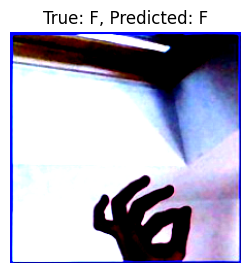

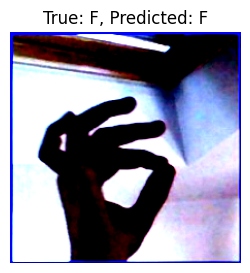

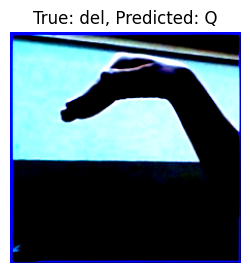

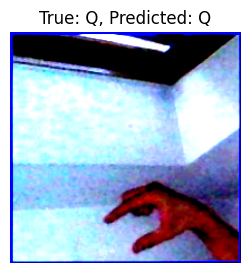

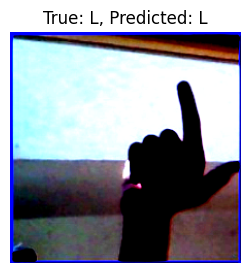

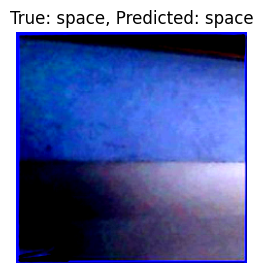

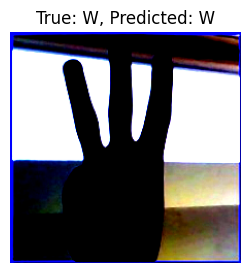

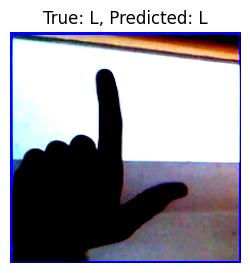

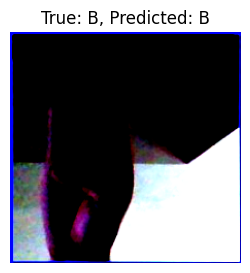

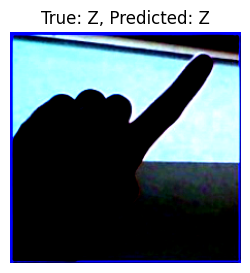

In [ ]:
visualize_predictions(model, test_loader, device, num_images=10)